In [199]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from scipy import spatial
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
import math

### Task 1

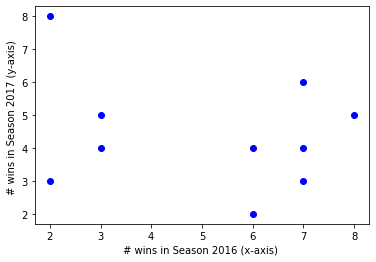

In [87]:
x1 = np.array([3,5])
x2 = np.array([3,4])
x3 = np.array([2,8])
x4 = np.array([2,3])
x5 = np.array([6,2])
x6 = np.array([6,4])
x7 = np.array([7,3])
x8 = np.array([7,4])
x9 = np.array([8,5])
x10 = np.array([7,6])
samples = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]

x = np.array([3,3,2,2,6,6,7,7,8,7])
y = np.array([5,4,8,3,2,4,3,4,5,6])
plt.xlabel("# wins in Season 2016 (x-axis) ") 
plt.ylabel("# wins in Season 2017 (y-axis) ") 
plt.plot(x,y,"ob") 
plt.show()

>(1) Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [70]:
# Calculate the Manhattan distance between x1 and c1
c1 = np.array([4,6])
c2 = np.array([5,4])

distance_c1 = list()
distance_c2 = list()

for i in samples:
    md_c1 = np.sum(np.abs(i-c1))
    distance_c1.append(md_c1)
    md_c2 = np.linalg.norm(i-c2,ord=1)
    distance_c2.append(md_c2)


print(distance_c1)
print("="*50)
print(distance_c2)

[2, 3, 4, 5, 6, 4, 6, 5, 5, 3]
[3.0, 2.0, 7.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 4.0]


>(2) Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric.
First, perform one iteration of the K-means algorithm and report the coordinates of the
resulting centroids. Second, please use K-Means to find two clusters.

In [72]:
# Calculate the Euclidean distance between x1 and c1
c1 = np.array([4,6])
c2 = np.array([5,4])
distance_c1 = list()
distance_c2 = list()

for i in samples:
    ed_c1 = np.sqrt(np.sum(np.square(i-c1)))
    ed_c1 = np.around(ed_c1, decimals=2)
    distance_c1.append(ed_c1)
    ed_c2 = np.linalg.norm(i-c2,ord=2)
    ed_c2 = np.around(ed_c2, decimals=2)
    distance_c2.append(ed_c2)
    

print(distance_c1)
print("="*50)
print(distance_c2)

[1.41, 2.24, 2.83, 3.61, 4.47, 2.83, 4.24, 3.61, 4.12, 3.0]
[2.24, 2.0, 5.0, 3.16, 2.24, 1.0, 2.24, 2.0, 3.16, 2.83]


>(3) Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric.First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [75]:
# Calculate the Manhattan distance between x1 and c1
c1 = np.array([3,3])
c2 = np.array([8,3])
distance_c1 = list()
distance_c2 = list()

for i in samples:
    md_c1 = np.sum(np.abs(i-c1))
    distance_c1.append(md_c1)
    md_c2 = np.linalg.norm(i-c2,ord=1)
    distance_c2.append(md_c2)
    
print(distance_c1)
print("="*50)
print(distance_c2)

[2, 1, 6, 1, 4, 4, 4, 5, 7, 7]
[7.0, 6.0, 11.0, 6.0, 3.0, 3.0, 1.0, 2.0, 2.0, 4.0]


>(4) Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [76]:
# Calculate the Manhattan distance between x1 and c1
c1 = np.array([3,2])
c2 = np.array([4,8])
distance_c1 = list()
distance_c2 = list()

for i in samples:
    md_c1 = np.sum(np.abs(i-c1))
    distance_c1.append(md_c1)
    md_c2 = np.linalg.norm(i-c2,ord=1)
    distance_c2.append(md_c2)
    
print(distance_c1)
print("="*50)
print(distance_c2)

[3, 2, 7, 2, 3, 5, 5, 6, 8, 8]
[4.0, 5.0, 2.0, 7.0, 8.0, 6.0, 8.0, 7.0, 7.0, 5.0]


## Task 2

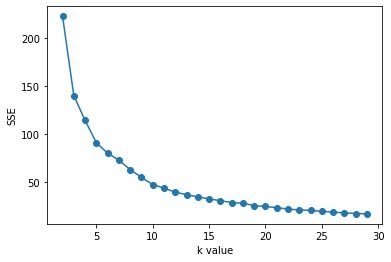

In [228]:
data = load_iris().data
label = load_iris()['target']
std = StandardScaler()
data = std.fit_transform(data)
sse = list()
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=100) 
    km.fit_transform(data)
#     sse.append(sum(np.min(cdist(data, km.cluster_centers_,'euclidean'),axis=1)))
    sse.append(km.inertia_)

plt.plot(range(2,30), sse, marker="o")
plt.xlabel("k value")
plt.ylabel('SSE')
plt.show()

In [251]:
type(km.cluster_centers_)

numpy.ndarray

In [138]:
'''
predict = km.predict(data)
matV = np.vstack([predict,label])
e_distance = pdist(matV)
c_distance = pdist(matV,'cosine')    # spatial.distance.cosine(predict, label)
j_distance = pdist(matV,'jaccard')

print ("Eudlidean distance:", e_distance)
print("Cosine distance:", c_distance)
print ("Jaccard distance:", j_distance)
'''

Eudlidean distance: [8.66025404]
Cosine distance: [0.14721442]
Jaccard distance: [0.75]


In [240]:
import math
import random
import time
# from Tkinter import *

######################################################################
# This section contains functions for loading CSV (comma separated values)
# files and convert them to a dataset of instances.
# Each instance is a tuple of attributes. The entire dataset is a list
# of tuples.
######################################################################

# Loads a CSV files into a list of tuples.
# Ignores the first row of the file (header).
# Numeric attributes are converted to floats, nominal attributes
# are represented with strings.
# Parameters:
#   fileName: name of the CSV file to be read
# Returns: a list of tuples
def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    del lines[0] # remove the header
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

# Converts a comma separated string into a tuple
# Parameters
#   line: a string
# Returns: a tuple
def lineToTuple(line):
    # remove leading/trailing witespace and newlines
    cleanLine = line.strip()
    # get rid of quotes
    cleanLine = cleanLine.replace('"', '')
    # separate the fields
    lineList = cleanLine.split(",")
    # convert strings into numbers
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

# Destructively converts all the string elements representing numbers
# to floating point numbers.
# Parameters:
#   myList: a list of strings
# Returns None
def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])

# Checks if a given string can be safely converted into a positive float.
# Parameters:
#   s: the string to be checked
# Returns: True if the string represents a positive float, False otherwise
def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True


######################################################################
# This section contains functions for clustering a dataset
# using the k-means algorithm.
######################################################################

def distance(instance1, instance2):
#     if instance1 == None or instance2 == None:
#         return float("inf")
    sumOfSquares = 0
    for i in range(1, len(instance1)):
        sumOfSquares += (instance1[i] - instance2[i])**2
    return sumOfSquares


def euclidean_distance(instance1,instance2):
    return np.sqrt(np.sum(np.square((instance1 - instance2))))

def cosine_distance(instance1,instance2):  
    dot_product, square_sum_instance1, square_sum_instance2 = 0, 0, 0
    for i in range(1,len(instance1)):
        dot_product += instance1[i] * instance2[i]
        square_sum_instance1 += instance1[i] * instance1[i]
        square_sum_instance2 += instance2[i] * instance2[i]
    cos = dot_product / (np.sqrt(square_sum_instance1) * np.sqrt(square_sum_instance2))
    return 1 - cos


def jaccard_distance(instance1,instance2):
    sum_min =  np.double(np.bitwise_and((instance1 != instance2),np.bitwise_or(instance1 != 0, instance2 != 0)).sum())
    sum_max = np.double(np.bitwise_or(instance1 != 0, instance2 != 0).sum())
    return sum_min/sum_max



def meanInstance(name, instanceList):
    numInstances = len(instanceList)
    if (numInstances == 0):
        return
    numAttributes = len(instanceList[0])
    means = [name] + [0] * (numAttributes-1)
    for instance in instanceList:
        for i in range(1, numAttributes):
            means[i] += instance[i]
    for i in range(1, numAttributes):
        means[i] /= float(numInstances)
    return tuple(means)

def assign(instance, centroids):
    minDistance = distance(instance, centroids[0])
#     minDistance = cosine_distance(instance,centroids[0])
#     minDistance = jaccard_distance(instance,centroids[0])
    minDistanceIndex = 0
    for i in range(1, len(centroids)):
        d = distance(instance, centroids[i])
#         d = cosine_distance(instance, centroids[i])
#         d = jaccard_distance(instance, centroids[i])
        if (d < minDistance):
            minDistance = d
            minDistanceIndex = i
    return minDistanceIndex

def createEmptyListOfLists(numSubLists):
    myList = []
    for i in range(numSubLists):
        myList.append([])
    return myList

def assignAll(instances, centroids):
    clusters = createEmptyListOfLists(len(centroids))
    for instance in instances:
        clusterIndex = assign(instance, centroids)
        clusters[clusterIndex].append(instance)
    return clusters

def computeCentroids(clusters):
    centroids = []
    for i in range(len(clusters)):
        name = "centroid" + str(i)
        centroid = meanInstance(name, clusters[i])
        centroids.append(centroid)
    return centroids

def kmeans(instances, k, animation=False, initCentroids=None):
    result = {}
    if (initCentroids == None or len(initCentroids) < k):
        # randomly select k initial centroids
        random.seed(time.time())
        centroids = random.sample(instances, k)
    else:
        centroids = initCentroids
    prevCentroids = []
    if animation:
        delay = 1.0 # seconds
        canvas = prepareWindow(instances)
        clusters = createEmptyListOfLists(k)
        clusters[0] = instances
        paintClusters2D(canvas, clusters, centroids, "Initial centroids")
        time.sleep(delay)
    iteration = 0
    while (centroids != prevCentroids):
        iteration += 1
        clusters = assignAll(instances, centroids)
        if animation:
            paintClusters2D(canvas, clusters, centroids, "Assign %d" % iteration)
            time.sleep(delay)
        prevCentroids = centroids
        centroids = computeCentroids(clusters)
        withinss = computeWithinss(clusters, centroids)
        if animation:
            paintClusters2D(canvas, clusters, centroids,
                            "Update %d, withinss %.1f" % (iteration, withinss))
            time.sleep(delay)
    result["clusters"] = clusters
    result["centroids"] = centroids
    result["withinss"] = withinss
    return result

def computeWithinss(clusters, centroids):
    result = 0
    for i in range(len(centroids)):
        centroid = centroids[i]
        cluster = clusters[i]
        for instance in cluster:
            result += distance(centroid, instance)
    return result

# Repeats k-means clustering n times, and returns the clustering
# with the smallest withinss
def repeatedKMeans(instances, k, n):
    bestClustering = {}
    bestClustering["withinss"] = float("inf")
    for i in range(1, n+1):
        print("k-means trial %d," % i)
        trialClustering = kmeans(instances, k)
        print("withinss: %.1f" % trialClustering["withinss"])
        if trialClustering["withinss"] < bestClustering["withinss"]:
            bestClustering = trialClustering
            minWithinssTrial = i
    print("Trial with minimum withinss:", minWithinssTrial)
    return bestClustering

######################################################################
# Test code
def sum_of_squares_error(instance1,instance2):
    if instance1 == None or instance2 == None:
        return float("inf")
    sum_e = 0
    for i in range(len(instance1)):
        sum_e += (instance1[i] - instance2[i]) ** 2
    return sum_e
    

# def euclidean_distance(instance1,instance2):
#     return np.sqrt(np.sum(np.square((instance1 - instance2))))

# def cosine_distance(instance1,instance2):  
#     dot_product, square_sum_instance1, square_sum_instance2 = 0, 0, 0
#     for i in range(len(instance1)):
#         dot_product += instance1[i] * instance2[i]
#         square_sum_instance1 += instance1[i] * instance1[i]
#         square_sum_instance2 += instance2[i] * instance2[i]
#     cos = dot_product / (np.sqrt(square_sum_instance1) * np.sqrt(square_sum_instance2))
#     return 1 - cos

# def jaccard_distance(instance1,instance2):
#     sum_min =  np.double(np.bitwise_and((instance1 != instance2),np.bitwise_or(instance1 != 0, instance2 != 0)).sum())
#     sum_max = np.double(np.bitwise_or(instance1 != 0, instance2 != 0).sum())
#     return sum_min/sum_max

######################################################################

# dataset = loadCSV("/Users/yanjiefu/Downloads/tshirts-G.csv")
# showDataset2D(dataset)
# clustering = kmeans(dataset, 3, True)
# printTable(clustering["centroids"])


In [146]:
e_d = euclidean_distance(predict,label)
c_d = cosine_distance(predict, label)
j_d = jaccard_distance(predict,label)

print ("Eudlidean distance:", e_d)
print("Cosine distance:", c_d)
print ("Jaccard distance:", j_d)

Eudlidean distance: 8.660254037844387
Cosine distance: 0.14721442129733264
Jaccard distance: 0.75


In [242]:
clustering_ed = kmeans(data,k=3)
clustering_ed

{'clusters': [[[-0.9006811702978099,
    1.0190043519716065,
    -1.3402265266227635,
    -1.3154442950077407],
   [-1.1430169111851116,
    -0.1319794793216258,
    -1.3402265266227635,
    -1.3154442950077407],
   [-1.3853526520724144,
    0.3284140531956675,
    -1.3970639535363667,
    -1.3154442950077407],
   [-1.5065205225160663,
    0.09821728693702086,
    -1.2833890997091604,
    -1.3154442950077407],
   [-1.0218490407414607,
    1.2492011182302531,
    -1.3402265266227635,
    -1.3154442950077407],
   [-0.5371775589668552,
    1.939791417006192,
    -1.169714245881954,
    -1.052179926427139],
   [-1.5065205225160663,
    0.7888075857129598,
    -1.3402265266227635,
    -1.18381211071744],
   [-1.0218490407414607,
    0.7888075857129598,
    -1.2833890997091604,
    -1.3154442950077407],
   [-1.748856263403368,
    -0.36217624558027245,
    -1.3402265266227635,
    -1.3154442950077407],
   [-1.1430169111851116,
    0.09821728693702086,
    -1.2833890997091604,
    -1.44707647

In [263]:
a = list()
b = list()
for i in clustering_ed["centroids"]:
    for j in i[1:]:
        a.append(j)
for idx in range(0, len(a), 3):
        b.append([a[idx], a[idx + 1], a[idx + 2]])
print(b)

[[0.9062549154367593, -1.3031082070057172, -1.2563441306325043], [-0.9062776931007095, 0.32045974701651353, 0.2186689800846746], [0.11823439704646814, 1.0049351316819917, 1.0768275760072918]]


In [267]:
data

[[-0.9006811702978099,
  1.0190043519716065,
  -1.3402265266227635,
  -1.3154442950077407],
 [-1.1430169111851116,
  -0.1319794793216258,
  -1.3402265266227635,
  -1.3154442950077407],
 [-1.3853526520724144,
  0.3284140531956675,
  -1.3970639535363667,
  -1.3154442950077407],
 [-1.5065205225160663,
  0.09821728693702086,
  -1.2833890997091604,
  -1.3154442950077407],
 [-1.0218490407414607,
  1.2492011182302531,
  -1.3402265266227635,
  -1.3154442950077407],
 [-0.5371775589668552,
  1.939791417006192,
  -1.169714245881954,
  -1.052179926427139],
 [-1.5065205225160663,
  0.7888075857129598,
  -1.3402265266227635,
  -1.18381211071744],
 [-1.0218490407414607,
  0.7888075857129598,
  -1.2833890997091604,
  -1.3154442950077407],
 [-1.748856263403368,
  -0.36217624558027245,
  -1.3402265266227635,
  -1.3154442950077407],
 [-1.1430169111851116,
  0.09821728693702086,
  -1.2833890997091604,
  -1.4470764792980415],
 [-0.5371775589668552,
  1.4793978844888998,
  -1.2833890997091604,
  -1.31544429

In [264]:
sse_ed = list()
a = list()
b = list()
#data = data.tolist()
for k in range(2,30):
    clustering_ed = kmeans(data,k=k)
    for i in clustering_ed["centroids"]:
        for j in i[1:]:
            a.append(j)
    for idx in range(0, len(a), 3):
        b.append([a[idx], a[idx + 1], a[idx + 2]])
    sse_ed.append(sum(np.min(cdist(data, b ,'euclidean'),axis=1)))
#     sse.append(km.inertia_)

plt.plot(range(2,30), sse_ed, marker="o")
plt.xlabel("k value")
plt.ylabel('SSE')
plt.show()

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [192]:
clustering_cd = kmeans(data.tolist(),k=3)
clustering_cd

{'clusters': [[[-1.6276883929597172,
    -1.7433568431321513,
    -1.3970639535363667,
    -1.18381211071744],
   [-0.4160096885232043,
    -1.7433568431321513,
    0.13754657313091806,
    0.13250973218556866],
   [0.7956690159133086,
    -0.5923730118389191,
    0.4785711346125367,
    0.3957741007661703],
   [-0.1736739476359015,
    -0.5923730118389191,
    0.42173370769893376,
    0.13250973218556866],
   [-1.1430169111851116,
    -1.5131600768735047,
    -0.26031541526430396,
    -0.262386820685334],
   [0.9168368863569595,
    -0.36217624558027245,
    0.4785711346125367,
    0.13250973218556866],
   [-0.779513299854158,
    -0.8225697780975647,
    0.08070914621731488,
    0.2641419164758693],
   [-1.0218490407414607,
    -2.43394714190809,
    -0.1466405614370976,
    -0.262386820685334],
   [0.18982966369505214,
    -1.973553609390797,
    0.13754657313091806,
    -0.262386820685334],
   [-0.29484181807955345,
    -0.36217624558027245,
    -0.08980313452349442,
    0.13250973

In [180]:
clustering_jd = kmeans(data.tolist(),k=3)
clustering_jd

{'clusters': [[[-0.9006811702978099,
    1.0190043519716065,
    -1.3402265266227635,
    -1.3154442950077407],
   [-1.1430169111851116,
    -0.1319794793216258,
    -1.3402265266227635,
    -1.3154442950077407],
   [-1.3853526520724144,
    0.3284140531956675,
    -1.3970639535363667,
    -1.3154442950077407],
   [-1.5065205225160663,
    0.09821728693702086,
    -1.2833890997091604,
    -1.3154442950077407],
   [-1.0218490407414607,
    1.2492011182302531,
    -1.3402265266227635,
    -1.3154442950077407],
   [-0.5371775589668552,
    1.939791417006192,
    -1.169714245881954,
    -1.052179926427139],
   [-1.5065205225160663,
    0.7888075857129598,
    -1.3402265266227635,
    -1.18381211071744],
   [-1.0218490407414607,
    0.7888075857129598,
    -1.2833890997091604,
    -1.3154442950077407],
   [-1.748856263403368,
    -0.36217624558027245,
    -1.3402265266227635,
    -1.3154442950077407],
   [-1.1430169111851116,
    0.09821728693702086,
    -1.2833890997091604,
    -1.44707647

 Q1: SSE: Euclidean-Kmeans is better
 Q2: Accuracy: Euclidean-Kmeans is better
 Q3: Cosine-K-means require more iterations and times
 Q4: when the maximum preset value (100) of iteration is complete 